## Predictiing delivery time from sorting time using Simple Linear Regression

In [1]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
data = pd.read_csv("C:/Users/Vishal Pawar/Downloads/delivery_time.csv")

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
# descriptive statastics
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
#correlation between the variables in a data
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [7]:
# changing column names for easy acess
data = data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)

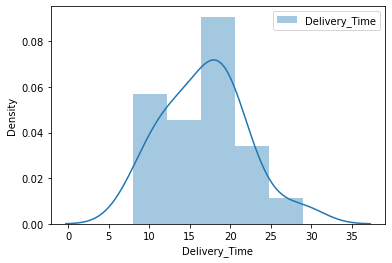

In [8]:
sns.distplot(data['Delivery_Time'],label = "Delivery_Time")
plt.legend()

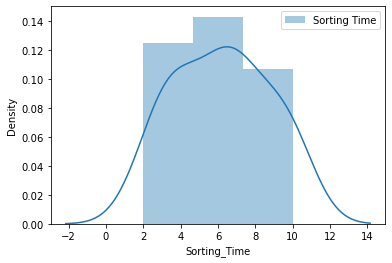

In [9]:
sns.distplot(data['Sorting_Time'],label = "Sorting Time")
plt.legend()

## Fitting a linear regression model

In [10]:
# without any transformation
model = smf.ols("Delivery_Time~Sorting_Time",data = data).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

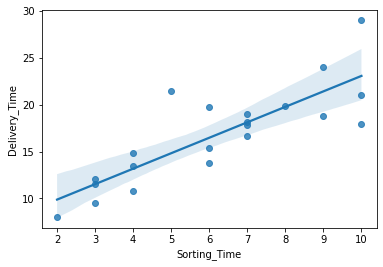

In [11]:
sns.regplot(x = "Sorting_Time", y = "Delivery_Time" , data = data )

In [12]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [13]:
print(model.tvalues, '\n' ,model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [14]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

## Predicting for new data point 

In [15]:
newdata=pd.Series([4,8])

In [16]:
# creating a dataframe for storing a new dataFrame
data_pred = pd.DataFrame(newdata,columns=['Sorting_Time'])

In [17]:
data_pred

,Sorting_Time
0,4
1,8


In [20]:
# predicting for new dataframe
model.predict(data_pred)

0    13.178814
1    19.774893
dtype: float64

In [21]:
x_log = np.log(data['Sorting_Time'])
y_log = np.log(data['Delivery_Time'])
x_sqrt = np.sqrt(data['Sorting_Time'])
y_sqrt = np.sqrt(data['Delivery_Time'])

In [22]:
data['log_sorting_time'] = x_log
data['log_delivery_time'] = y_log
data['sqrt_sorting_time'] = x_sqrt
data['sqrt_delivery_time'] = y_sqrt

In [23]:
data

,Delivery_Time,Sorting_Time,log_sorting_time,log_delivery_time,sqrt_sorting_time,sqrt_delivery_time
0,21.00,10,2.302585,3.044522,3.162278,4.582576
1,13.50,4,1.386294,2.602690,2.000000,3.674235
2,19.75,6,1.791759,2.983153,2.449490,4.444097
3,24.00,9,2.197225,3.178054,3.000000,4.898979
4,29.00,10,2.302585,3.367296,3.162278,5.385165
5,15.35,6,1.791759,2.731115,2.449490,3.917908
6,19.00,7,1.945910,2.944439,2.645751,4.358899
7,9.50,3,1.098612,2.251292,1.732051,3.082207
8,17.90,10,2.302585,2.884801,3.162278,4.230839
9,18.75,9,2.197225,2.931194,3.000000,4.330127


In [24]:
model1 = smf.ols("Delivery_Time~log_sorting_time",data = data).fit()
print(model1.tvalues, '\n' ,model1.pvalues)
print('rsquared value is {} using log transformation on input variable'.format(model1.rsquared,model1.rsquared_adj))

Intercept           0.472460
log_sorting_time    6.586789
dtype: float64 
 Intercept           0.641980
log_sorting_time    0.000003
dtype: float64
rsquared value is 0.6954434611324223 using log transformation on input variable


In [25]:
model2 = smf.ols("log_delivery_time~Sorting_Time",data = data).fit()
print(model2.tvalues, '\n' ,model2.pvalues)
print('rsquared value is {} using log transformation on Target variable'.format(model2.rsquared,model2.rsquared_adj))

Intercept       20.601357
Sorting_Time     6.836088
dtype: float64 
 Intercept       1.857343e-14
Sorting_Time    1.592708e-06
dtype: float64
rsquared value is 0.7109478980584187 using log transformation on Target variable


In [26]:
model3 = smf.ols("log_delivery_time~log_sorting_time",data = data).fit()
print(model3.tvalues, '\n' ,model3.pvalues)
print('rsquared value is {} using log transformation on both input and target variable'.format(model3.rsquared,model3.rsquared_adj))

Intercept           13.085552
log_sorting_time     8.024484
dtype: float64 
 Intercept           5.921137e-11
log_sorting_time    1.601539e-07
dtype: float64
rsquared value is 0.77216134926874 using log transformation on both input and target variable


In [27]:
model4 = smf.ols("Delivery_Time~sqrt_sorting_time",data = data).fit()
print(model4.tvalues, '\n' ,model4.pvalues)
print('rsquared value is {} using sqrt transformation on input variable'.format(model4.rsquared,model4.rsquared_adj))

Intercept           -0.840911
sqrt_sorting_time    6.592434
dtype: float64 
 Intercept            0.410857
sqrt_sorting_time    0.000003
dtype: float64
rsquared value is 0.6958062276308671 using sqrt transformation on input variable


In [28]:
model5 = smf.ols("sqrt_delivery_time~Sorting_Time",data = data).fit()
print(model5.tvalues, '\n' ,model5.pvalues)
print('rsquared value is {} using sqrt transformation on Target variable'.format(model5.rsquared,model5.rsquared_adj))

Intercept       13.527452
Sorting_Time     6.723095
dtype: float64 
 Intercept       3.339366e-11
Sorting_Time    2.001215e-06
dtype: float64
rsquared value is 0.704049871541756 using sqrt transformation on Target variable


In [29]:
model6 = smf.ols("sqrt_delivery_time~sqrt_sorting_time",data = data).fit()
print(model6.tvalues, '\n' ,model6.pvalues)
print('rsquared value is {} using sqrt transformation on both Target and inpit variable'.format(model6.rsquared,model6.rsquared_adj))

Intercept            4.628248
sqrt_sorting_time    7.152817
dtype: float64 
 Intercept            1.833621e-04
sqrt_sorting_time    8.475706e-07
dtype: float64
rsquared value is 0.7292011987544664 using sqrt transformation on both Target and inpit variable


###  From the above observations we can see that with the log transformation of the both input and output variables we have the best R squared value which explains the 77% variations

## Predicting Salary Hike

In [30]:
# importng dataset
df = pd.read_csv("C:/Users/Vishal Pawar/Downloads/Salary_Data.csv")

In [31]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [33]:
# descriptive statastics
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [34]:
# correlation 
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


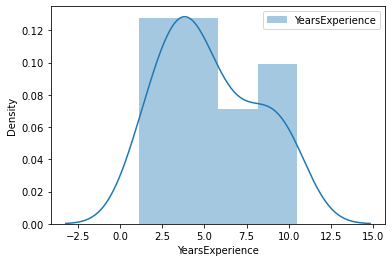

In [35]:
sns.distplot(df['YearsExperience'],label = "YearsExperience")
plt.legend()

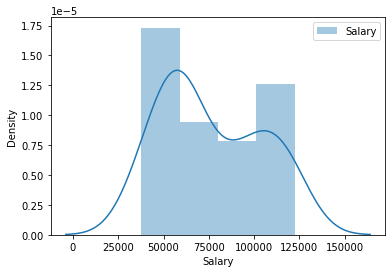

In [36]:
sns.distplot(df['Salary'],label = "Salary")
plt.legend()

## Fitting a linear regression model

In [37]:
model1 = smf.ols("Salary~YearsExperience", data = df).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

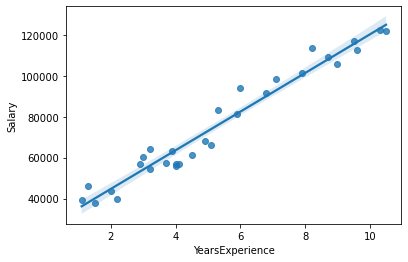

In [38]:
sns.regplot(x = "YearsExperience", y ="Salary",data = df)

In [39]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [40]:
print(model1.tvalues, '\n' ,model1.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [41]:
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [42]:
X_log = np.log(df['YearsExperience'])
Y_log = np.log(df['Salary'])
X_sqrt = np.sqrt(df['YearsExperience'])
Y_sqrt = np.sqrt(df['Salary'])

In [43]:
df['log_years_of_experience'] = X_log
df['log_salary'] = Y_log
df['sqrt_years_of_experience'] = X_sqrt
df['sqrt_salary'] = Y_sqrt

In [44]:
df

,YearsExperience,Salary,log_years_of_experience,log_salary,sqrt_years_of_experience,sqrt_salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314
5,2.9,56642.0,1.064711,10.944506,1.702939,237.995798
6,3.0,60150.0,1.098612,11.004597,1.732051,245.254969
7,3.2,54445.0,1.163151,10.904946,1.788854,233.334524
8,3.2,64445.0,1.163151,11.073567,1.788854,253.860198
9,3.7,57189.0,1.308333,10.954117,1.923538,239.142217


In [45]:
model_log_x = smf.ols("Salary~log_years_of_experience",data = df).fit()
print(model_log_x.tvalues, '\n' ,model_log_x.pvalues)
print('rsquared value is {} using log transformation on input variable'.format(model_log_x.rsquared,model_log_x.rsquared_adj))

Intercept                   2.895135
log_years_of_experience    12.791989
dtype: float64 
 Intercept                  7.268813e-03
log_years_of_experience    3.250155e-13
dtype: float64
rsquared value is 0.853888882875697 using log transformation on input variable


In [46]:
model_log_y = smf.ols("log_salary~YearsExperience",data = df).fit()
print(model_log_y.tvalues, '\n' ,model_log_y.pvalues)
print('rsquared value is {} using log transformation on tagrt variable'.format(model_log_y.rsquared,model_log_y.rsquared_adj))

Intercept          273.327166
YearsExperience     19.584833
dtype: float64 
 Intercept          1.604634e-49
YearsExperience    7.027439e-18
dtype: float64
rsquared value is 0.9319671194084196 using log transformation on tagrt variable


In [47]:
model_log_x_y = smf.ols("log_salary~log_years_of_experience",data = df).fit()
print(model_log_x_y.tvalues, '\n' ,model_log_x_y.pvalues)
print('rsquared value is {} using log transformation on tagrt and input variable'.format(model_log_x_y.rsquared,model_log_x_y.rsquared_adj))

Intercept                  184.867959
log_years_of_experience     16.352542
dtype: float64 
 Intercept                  9.073132e-45
log_years_of_experience    7.395278e-16
dtype: float64
rsquared value is 0.905215072581715 using log transformation on tagrt and input variable


In [48]:
model_sqrt_x = smf.ols("Salary~sqrt_years_of_experience",data = df).fit()
print(model_sqrt_x.tvalues, '\n' ,model_sqrt_x.pvalues)
print('rsquared value is {} using sqrt transformation on input variable'.format(model_sqrt_x.rsquared,model_sqrt_x.rsquared_adj))

Intercept                   -3.262308
sqrt_years_of_experience    19.437148
dtype: float64 
 Intercept                   2.906965e-03
sqrt_years_of_experience    8.565358e-18
dtype: float64
rsquared value is 0.9310009544993526 using sqrt transformation on input variable


In [49]:
model_sqrt_y = smf.ols("sqrt_salary~YearsExperience",data = df).fit()
print(model_sqrt_y.tvalues, '\n' ,model_sqrt_y.pvalues)
print('rsquared value is {} using sqrt transformation on target variable'.format(model_sqrt_y.rsquared,model_sqrt_y.rsquared_adj))

Intercept          40.646251
YearsExperience    23.025247
dtype: float64 
 Intercept          1.920194e-26
YearsExperience    9.782891e-20
dtype: float64
rsquared value is 0.9498353533865289 using sqrt transformation on target variable


In [50]:
model_sqrt_x_y = smf.ols("sqrt_salary~sqrt_years_of_experience",data = df).fit()
print(model_sqrt_x_y.tvalues, '\n' ,model_sqrt_x_y.pvalues)
print('rsquared value is {} using sqrt transformation on both target anf input variable'.format(model_sqrt_x_y.rsquared,model_sqrt_x_y.rsquared_adj))

Intercept                   12.663496
sqrt_years_of_experience    21.315126
dtype: float64 
 Intercept                   4.141645e-13
sqrt_years_of_experience    7.584326e-19
dtype: float64
rsquared value is 0.9419490138976825 using sqrt transformation on both target anf input variable


### From the above observations or transformations we can see how with the without transformation gives us the better R squared value

##  Predicting for new datapoint

In [51]:
new_df = pd.Series([5,7])

In [52]:
data_pred1 =pd.DataFrame(new_df,columns=['YearsExperience'])
data_pred1

,YearsExperience
0,5
1,7


In [53]:
model1.predict(data_pred1)

0    73042.011806
1    91941.936449
dtype: float64